In [1]:
!apt-get -y install fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

import os
import re
import time
import datetime as dt # 사용시 datetime.dt 로 사용 # 현재 시간 사용
from datetime import datetime # 사용시 함수로 바로 사용 #-> 시간 비교

In [3]:
df_suggestion = pd.read_excel("../content/drive/MyDrive/Project/summonerswar/df_suggestion.xlsx", index_col=0)
df_suggestion

,title,url,date,like
0,pc 클라에서 앱을 실행할 때 주황색 알림 비활성화 옵션 건의,https://cafe.naver.com/ArticleRead.nhn?clubid=...,00:33,0
1,콜라보레이션 몬스터도 형상변환 가능하게 만들어주세요.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.10.21.,0
2,2각 몬스터 스작 좀 없애주시면 안되나요?,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.10.21.,0
3,아레나 초기화주에 어떻게좀해봐요,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.10.20.,0
4,섬꾸미게 검정색 장식좀만들어줘,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.10.19.,0
...,...,...,...,...
6713,변두리서버에 소수의 의견도 의견입니다 아이린님,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2020.01.02.,0
6714,어찌 잠잠하다했다 폭주시발덱보정 ㅅㅂ,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2020.01.02.,0
6715,고대 룬 질문드립니다.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2020.01.02.,0
6716,"물극지,풍하프버그/ 물발키리/ 실레나보상,상점패치좀해주세요",https://cafe.naver.com/ArticleRead.nhn?clubid=...,2020.01.02.,0


In [4]:
pd.DataFrame(df_suggestion["like"].value_counts()).sort_values(by="like",ascending=False)

,count
like,
68,1
39,1
31,1
30,1
23,1
20,1
17,1
15,2
14,1


In [5]:
df_suggestion_sorted = df_suggestion.sort_values(by = "like", ascending = False)
df_suggestion_sorted

,title,url,date,like
1086,현 실레나 밸런스를 방관하고 있는 컴투스에게 묻습니다,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.09.12.,68
597,점령전 시즌을 마치면서,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.02.27.,39
521,편의성 개선 몇 가지 건의 (지극히 개인적),https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.03.25.,31
1050,[초장문] 실레나에도 변화가 필요합니다.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.09.20.,30
2934,후배 5명에게 서머너즈워를 시켜본지 2주 후 소감 후기입니다. 초보자 진입장벽 심각해요.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.01.26.,23
...,...,...,...,...
2468,아레나 방실했을때 상대가 무슨공덱 썼는지 알 수 있게 해주세요,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.06.04.,0
2467,편의성 개선 무지개몬 관련,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.06.05.,0
2465,4성데빌몬팩좀팔아줘요,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.06.05.,0
2464,카페 게시판 개편 바랍니다,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.06.06.,0


In [6]:
df_suggestion_sorted.describe()

,like
count,6718.000000
mean,0.220304
std,1.444726
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,68.000000


## 게시글 제목에서 키워드를 분류하여 토픽 컬럼 생성

In [7]:
df_suggestion_topic = df_suggestion_sorted.copy()

# 조건 리스트 정의
conditions = [
    df_suggestion_topic['title'].str.contains('실레나|스레나|스페셜'),
    df_suggestion_topic['title'].str.contains('아레나'),
    df_suggestion_topic['title'].str.contains('점령|점령전|점전'),
    df_suggestion_topic['title'].str.contains('퀘|일퀘|던전|보스'),
    df_suggestion_topic['title'].str.contains('폭주|룬'),
    df_suggestion_topic['title'].str.contains('상향|하향|너프|버프|밸패|밸런스'),
    df_suggestion_topic['title'].str.contains('편의|연속전투|자동사냥|보관|저장'),
    df_suggestion_topic['title'].str.contains('초보|입문|섬린이|섬생아|신규|뉴비'),
    df_suggestion_topic['title'].str.contains('개편|게시판|카페'),
    df_suggestion_topic['title'].str.contains('과금|패키지|팩|현질|현금|캐쉬|판매'),
    df_suggestion_topic['title'].str.contains('계정|로그인'),
    df_suggestion_topic['title'].str.contains('거래')
]

# 결과 리스트 정의
results = ["실레나", "아레나", "점령전", "퀘스트", "룬", "몬스터", "편의성", "초보자 입문", "네이버 카페", "과금", "계정", "거래"]

# np.select를 사용하여 조건에 맞는 값을 B열에 할당
df_suggestion_topic['topic'] = np.select(conditions, results, default='')
df_suggestion_topic

,title,url,date,like,topic
1086,현 실레나 밸런스를 방관하고 있는 컴투스에게 묻습니다,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.09.12.,68,실레나
597,점령전 시즌을 마치면서,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.02.27.,39,점령전
521,편의성 개선 몇 가지 건의 (지극히 개인적),https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.03.25.,31,편의성
1050,[초장문] 실레나에도 변화가 필요합니다.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.09.20.,30,실레나
2934,후배 5명에게 서머너즈워를 시켜본지 2주 후 소감 후기입니다. 초보자 진입장벽 심각해요.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.01.26.,23,초보자 입문
...,...,...,...,...,...
2468,아레나 방실했을때 상대가 무슨공덱 썼는지 알 수 있게 해주세요,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.06.04.,0,아레나
2467,편의성 개선 무지개몬 관련,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.06.05.,0,편의성
2465,4성데빌몬팩좀팔아줘요,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.06.05.,0,과금
2464,카페 게시판 개편 바랍니다,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.06.06.,0,네이버 카페


In [8]:
df_suggestion_topic.query("topic == ''")

,title,url,date,like,topic
1738,게임의 시스템 문제? (장문),https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.02.17.,20,
655,확률 공개 요청합니다,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.02.01.,15,
747,컴투스 관계자분께 정중히 건의 드립니다.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.12.14.,13,
1460,서머에게 바라는 40가지,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.06.22.,12,
894,컴투스 패치하는 사람 ㄹㅇ 틀딱인가 아니면 서머너랑 유저감성을 모르나?,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.11.06.,12,
...,...,...,...,...,...
2463,천공의 섬 확장을 더 늘려주세요,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.06.06.,0,
2487,암데몬은 왜 패치안해주냐? 암토템하고,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.05.31.,0,
2482,결국엔 암비라가 제일 버러지됨ㅋㅋ,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.06.01.,0,
2476,모바일 1대1문의,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.06.02.,0,


## 좋아요 수가 1개 이상인 게시글들에 대해 직접 토픽을 부여 - 공감을 하나라도 받았다는 의미

In [9]:
df_suggestion_like = df_suggestion_sorted.query("like != 0")
df_suggestion_like

,title,url,date,like
1086,현 실레나 밸런스를 방관하고 있는 컴투스에게 묻습니다,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.09.12.,68
597,점령전 시즌을 마치면서,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.02.27.,39
521,편의성 개선 몇 가지 건의 (지극히 개인적),https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.03.25.,31
1050,[초장문] 실레나에도 변화가 필요합니다.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.09.20.,30
2934,후배 5명에게 서머너즈워를 시켜본지 2주 후 소감 후기입니다. 초보자 진입장벽 심각해요.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.01.26.,23
...,...,...,...,...
1739,태5성 노중복 게이지같은것좀 만들자,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.02.17.,1
392,빛드나 버프 기원 11일차,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.05.06.,1
2007,1성 모두 먹이기 추가 건의,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.11.01.,1
3637,물드루 버프 기원 27일차,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2021.06.26.,1


In [10]:
# 조건 리스트 정의
conditions = [
    df_suggestion_like['title'].str.contains('실레나|스레나|스페셜|아레나'), #1
    df_suggestion_like['title'].str.contains('퀘|일퀘|던전|보스|속성|점령|점령전|점전|길드|이계|레이드|토벌|결정|차원|차홀|미궁'), #2
    df_suggestion_like['title'].str.contains('상향|하향|너프|버프|밸패|밸런스|밸붕'), #3
    df_suggestion_like['title'].str.contains('폭주|룬|절망|응보|격노'), #4
    df_suggestion_like['title'].str.contains('편의|연속|전투|자동|사냥|보관|저장|건물|형상|형변|확률|소환|상점|상갱|마나|줌인|재료'), #5
    df_suggestion_like['title'].str.contains('초보|입문|섬린이|섬생아|신규|뉴비'), #6
    df_suggestion_like['title'].str.contains('로그인|접속|계정'), #7
    df_suggestion_like['title'].str.contains('과금|패키지|팩|현질|현금|캐쉬|판매|돈'), #8
    df_suggestion_like['title'].str.contains('보상'), #9
    df_suggestion_like['title'].str.contains('버그|오류') #10
]

# 결과 리스트 정의 - 10가지
results = ["PvP", "PvE", "몬스터", "룬", "게임 기능", "신규 유저", "보안", "과금", "보상", "버그"]

# np.select를 사용하여 조건에 맞는 값을 할당
df_suggestion_like['topic'] = np.select(conditions, results, default='')
df_suggestion_like

<ipython-input-10-36eb49606fd6>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_suggestion_like['topic'] = np.select(conditions, results, default='')


,title,url,date,like,topic
1086,현 실레나 밸런스를 방관하고 있는 컴투스에게 묻습니다,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.09.12.,68,PvP
597,점령전 시즌을 마치면서,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.02.27.,39,PvE
521,편의성 개선 몇 가지 건의 (지극히 개인적),https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.03.25.,31,게임 기능
1050,[초장문] 실레나에도 변화가 필요합니다.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.09.20.,30,PvP
2934,후배 5명에게 서머너즈워를 시켜본지 2주 후 소감 후기입니다. 초보자 진입장벽 심각해요.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.01.26.,23,신규 유저
...,...,...,...,...,...
1739,태5성 노중복 게이지같은것좀 만들자,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.02.17.,1,
392,빛드나 버프 기원 11일차,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.05.06.,1,몬스터
2007,1성 모두 먹이기 추가 건의,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.11.01.,1,
3637,물드루 버프 기원 27일차,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2021.06.26.,1,몬스터


In [11]:
# # 엑셀 내보낸 후 수기로 추가 작업 진행
# df_suggestion_like.to_excel("../content/drive/MyDrive/Project/summonerswar/df_suggestion_like.xlsx")

## 연도별 건의사항 주제 시각화

In [12]:
# 토픽 부여 작업 완료
df_suggestion_like = pd.read_excel("../content/drive/MyDrive/Project/summonerswar/df_suggestion_like.xlsx", index_col=0)
df_suggestion_like

,title,url,date,like,topic
1086,현 실레나 밸런스를 방관하고 있는 컴투스에게 묻습니다,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.09.12.,68,PvP
597,점령전 시즌을 마치면서,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.02.27.,39,PvE
521,편의성 개선 몇 가지 건의 (지극히 개인적),https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.03.25.,31,게임 기능
1050,[초장문] 실레나에도 변화가 필요합니다.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.09.20.,30,PvP
2934,후배 5명에게 서머너즈워를 시켜본지 2주 후 소감 후기입니다. 초보자 진입장벽 심각해요.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.01.26.,23,신규 유저
...,...,...,...,...,...
1739,태5성 노중복 게이지같은것좀 만들자,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.02.17.,1,PvE
392,빛드나 버프 기원 11일차,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.05.06.,1,몬스터
2007,1성 모두 먹이기 추가 건의,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.11.01.,1,게임 기능
3637,물드루 버프 기원 27일차,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2021.06.26.,1,몬스터


In [13]:
df_suggestion_like['topic'] = df_suggestion_like['topic'].replace('게임 _x0008_기능', '게임 기능')
df_suggestion_like['topic'] = df_suggestion_like['topic'].replace('게임 기능', '편의/시스템')
df_suggestion_like

,title,url,date,like,topic
1086,현 실레나 밸런스를 방관하고 있는 컴투스에게 묻습니다,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.09.12.,68,PvP
597,점령전 시즌을 마치면서,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.02.27.,39,PvE
521,편의성 개선 몇 가지 건의 (지극히 개인적),https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.03.25.,31,편의/시스템
1050,[초장문] 실레나에도 변화가 필요합니다.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.09.20.,30,PvP
2934,후배 5명에게 서머너즈워를 시켜본지 2주 후 소감 후기입니다. 초보자 진입장벽 심각해요.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.01.26.,23,신규 유저
...,...,...,...,...,...
1739,태5성 노중복 게이지같은것좀 만들자,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.02.17.,1,PvE
392,빛드나 버프 기원 11일차,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.05.06.,1,몬스터
2007,1성 모두 먹이기 추가 건의,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.11.01.,1,편의/시스템
3637,물드루 버프 기원 27일차,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2021.06.26.,1,몬스터


In [14]:
# date를 datetime으로 변환
df_suggestion_like["year"] = pd.to_datetime(df_suggestion_like["date"])
# datetime을 연도로 변환
df_suggestion_like["year"]=df_suggestion_like["year"].dt.year
df_suggestion_like

,title,url,date,like,topic,year
1086,현 실레나 밸런스를 방관하고 있는 컴투스에게 묻습니다,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.09.12.,68,PvP,2023
597,점령전 시즌을 마치면서,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.02.27.,39,PvE,2024
521,편의성 개선 몇 가지 건의 (지극히 개인적),https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.03.25.,31,편의/시스템,2024
1050,[초장문] 실레나에도 변화가 필요합니다.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.09.20.,30,PvP,2023
2934,후배 5명에게 서머너즈워를 시켜본지 2주 후 소감 후기입니다. 초보자 진입장벽 심각해요.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.01.26.,23,신규 유저,2022
...,...,...,...,...,...,...
1739,태5성 노중복 게이지같은것좀 만들자,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.02.17.,1,PvE,2023
392,빛드나 버프 기원 11일차,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.05.06.,1,몬스터,2024
2007,1성 모두 먹이기 추가 건의,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.11.01.,1,편의/시스템,2022
3637,물드루 버프 기원 27일차,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2021.06.26.,1,몬스터,2021


In [15]:
df_suggestion_like["topic"].unique()

array(['PvP', 'PvE', '편의/시스템', '신규 유저', '보상', '보안', '기타', '룬', '몬스터',
       '과금', '버그'], dtype=object)

In [21]:
# 기타 값에 대해서는 정확히 어떤 주제인지 정하기 어려우므로 제거함.
df_suggestion_like = df_suggestion_like.query("topic != '기타'")
df_suggestion_like

,title,url,date,like,topic,year
1086,현 실레나 밸런스를 방관하고 있는 컴투스에게 묻습니다,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.09.12.,68,PvP,2023
597,점령전 시즌을 마치면서,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.02.27.,39,PvE,2024
521,편의성 개선 몇 가지 건의 (지극히 개인적),https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.03.25.,31,편의/시스템,2024
1050,[초장문] 실레나에도 변화가 필요합니다.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.09.20.,30,PvP,2023
2934,후배 5명에게 서머너즈워를 시켜본지 2주 후 소감 후기입니다. 초보자 진입장벽 심각해요.,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.01.26.,23,신규 유저,2022
...,...,...,...,...,...,...
1739,태5성 노중복 게이지같은것좀 만들자,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2023.02.17.,1,PvE,2023
392,빛드나 버프 기원 11일차,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2024.05.06.,1,몬스터,2024
2007,1성 모두 먹이기 추가 건의,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2022.11.01.,1,편의/시스템,2022
3637,물드루 버프 기원 27일차,https://cafe.naver.com/ArticleRead.nhn?clubid=...,2021.06.26.,1,몬스터,2021


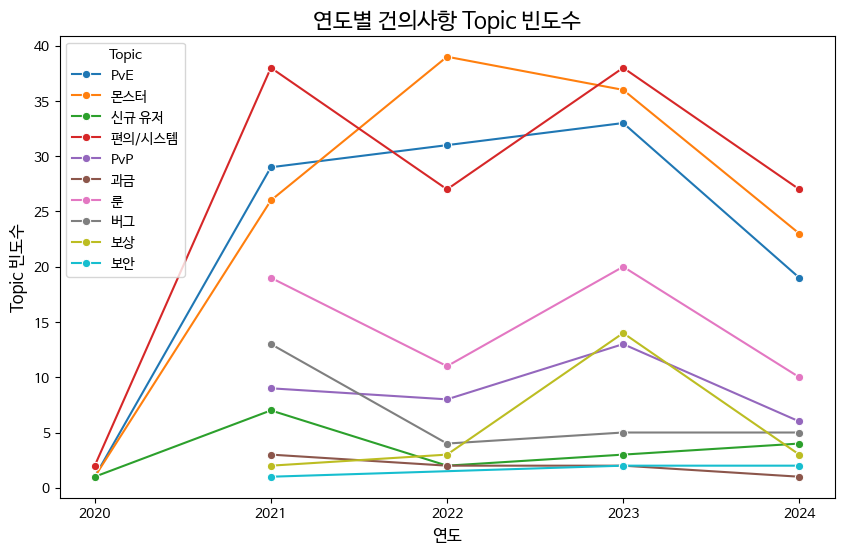

In [36]:
# 연도별 topic 빈도수 집계
df_counts = df_suggestion_like.groupby(['year', 'topic']).size().reset_index(name='count')
df_counts['year'] = df_counts['year'].astype(str)

plt.figure(figsize=(10, 6))  # 그래프 크기 조정

# sns.lineplot 사용
sns.lineplot(data=df_counts, x='year', y='count', hue='topic', marker='o')

# 제목과 라벨 설정
plt.title('연도별 건의사항 Topic 빈도수', fontsize=16)
plt.xlabel('연도', fontsize=12)
plt.ylabel('Topic 빈도수', fontsize=12)

# 그래프 표시
plt.legend(title='Topic')
plt.show()

## 분석 결과

- 키워드를 이용한 세부적인 주제를 생성하려고 했지만 키워드 다양성이 방대하여 제대로 된 주제 부여 불가.
- Topic 리스트 값 부여 ("PvP", "PvE", "몬스터", "룬", "게임 기능", "신규 유저", "보안", "과금", "보상", "버그")
- 대체적으로 매년 편의/시스템 기능, 몬스터, PvE, 룬 문제에 대한 건의사항이 많다는 것을 볼 수 있음.
  + 다만, 다른 topic의 건의사항은 많이 없다는 것이 아니라 공감을 받은 건의사항에 대한 지표일 뿐임.

## 인사이트 결과

- 매년 편의성과 시스템 문제에 대해 해결하는 것이 중요하다고 여겨짐.
- 몬스터 밸런스 패치를 적절한 시기에 잘 고려해야함.
- 룬 밸런스 또한 올바르게 작동하고 있는지 테스트하고 모니터링 해야할 것으로 보임.